# Survival Analysis

In [1]:
# Import Packages:
using Pkg
#Pkg.add("CSV")
#Pkg.add("DataFrames")
#Pkg.add("StatsBase")
#Pkg.add("SQLite")

In [2]:
# Read the CSV File:
using CSV
using DataFrames
using Dates
using Plots

In [3]:
# Load the CSV file
file_path = "../data/AbsenceList_SampleData.csv"  # Update with the correct file path
#file_path = "../data/AbsenceList_TransitionMatrix.csv"  # Update with the correct file path
data = CSV.File(file_path, delim='\t') |> DataFrame

# Rename variable names in order to get rid of the spaces in the names
rename!(data,[:Full_name,:First_name, :ID, :Class, :Start_date, :Start_time, :End_date, :End_time])
describe(data)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Nothing,Union…,Nothing,Union…,Int64,DataType
1,Full_name,,Connor,,Walker,0,String15
2,First_name,,Douglas,,Vincent,0,String7
3,ID,,,,,50,Missing
4,Class,,CS101,,CS101,0,String7
5,Start_date,,"Dec 6, 2023",,"Sep 29, 2023",0,String15
6,Start_time,,10:30 AM,,9:25 AM,0,String15
7,End_date,,"Dec 6, 2023",,"Sep 29, 2023",0,String15
8,End_time,,10:15 AM,,9:20 AM,0,String15


In [4]:
##### ##### Formatting of some variables ##### ##### (should be written in cleaner code!)

##### Create a new date variable for "Start date"
# This step is necessary as the variable is not standard and therefore not recognized by the "Date" package.


# Extract the last 4 characters of "Start date" and create a new column "Year"
data[!, "Year"] = last.(string.(data[!, :Start_date]), 4)

# Extract the first 5 characters of "Start date" and create a new column "First5Chars"
data[!, "First5Chars"] = first.(string.(data[!, :Start_date]), 6)

# Remove the comma from "First5Chars" and update the column
data[!, "First5Chars"] = replace.(data[!, "First5Chars"], "," => "")

# Extract the first three characters of "First5Chars" and create a new column "Month"
data[!, "Month"] = first.(string.(data[!, "First5Chars"]), 3)

# Extract the last two characters of "First5Chars" and create a new column "Day"
data[!, "Day"] = last.(string.(data[!, "First5Chars"]), 2)


# Define a dictionary to map month abbreviations to numerical values
month_dict = Dict("Jan" => 1, "Feb" => 2, "Mar" => 3, "Apr" => 4, "May" => 5, "Jun" => 6, "Jul" => 7, "Aug" => 8, "Sep" => 9, "Oct" => 10, "Nov" => 11, "Dec" => 12)

# Create a new column "MonthNumeric" by mapping the month abbreviations to numerical values
data[!, "MonthNumeric"] = [month_dict[strip(string(month))] for month in data[!, "Month"]]

# Create a new column "NewDate" by combining "Year," "MonthNumeric," and "Day"
data[!, "StartDate"] = Dates.Date.(parse.(Int, data[!, "Year"]), data[!, "MonthNumeric"], parse.(Int, data[!, "Day"]))

# Suppose you want to delete columns "Month" and "Year"
select!(data, Not(:Month, :Year, :Day, :First5Chars, :MonthNumeric  ))


##### Create a new date variable for "End date"
# This step is necessary as the variable is not standard and therefore not recognized by the "Date" package.

# Extract the last 4 characters of "Start date" and create a new column "Year"
data[!, "Year"] = last.(string.(data[!, :End_date]), 4)

# Extract the first 5 characters of "Start date" and create a new column "First5Chars"
data[!, "First5Chars"] = first.(string.(data[!, :End_date]), 6)

# Remove the comma from "First5Chars" and update the column
data[!, "First5Chars"] = replace.(data[!, "First5Chars"], "," => "")

# Extract the first three characters of "First5Chars" and create a new column "Month"
data[!, "Month"] = first.(string.(data[!, "First5Chars"]), 3)

# Extract the last two characters of "First5Chars" and create a new column "Day"
data[!, "Day"] = last.(string.(data[!, "First5Chars"]), 2)


# Define a dictionary to map month abbreviations to numerical values
month_dict = Dict("Jan" => 1, "Feb" => 2, "Mar" => 3, "Apr" => 4, "May" => 5, "Jun" => 6, "Jul" => 7, "Aug" => 8, "Sep" => 9, "Oct" => 10, "Nov" => 11, "Dec" => 12)

# Create a new column "MonthNumeric" by mapping the month abbreviations to numerical values
data[!, "MonthNumeric"] = [month_dict[strip(string(month))] for month in data[!, "Month"]]

# Create a new column "NewDate" by combining "Year," "MonthNumeric," and "Day"
data[!, "EndDate"] = Dates.Date.(parse.(Int, data[!, "Year"]), data[!, "MonthNumeric"], parse.(Int, data[!, "Day"]))

# Suppose you want to delete columns "Month" and "Year"
select!(data, Not(:Month, :Year, :Day, :First5Chars, :MonthNumeric  ))


##### Create a new date variable for "Start time"
# This step is necessary as the variable is not standard and therefore not recognized by the "Date" package.

starttime = data[!, :Start_time]
meridiem = last.(starttime,2)
time = first.(starttime,5)
hourtemp = first.(time,2)
minutetemp = last.(time,3)
minutetemp1 = replace.(minutetemp, ":" => "")
minutetemp2 = replace.(minutetemp1, " " => "")

hour = replace.(hourtemp, ":" => "")
minute = minutetemp2

data[!,"StartTimeHour"] = hour;
data[!,"StartTimeMinute"] = minute;
data[!,"StartTimeMeridiem"] = meridiem;

# Define as Time format
data[!,"time_format_str"] = hour .* ":" .* minute .* " " .* meridiem
data[!,"StartTime"] = Dates.Time.(data[!,"time_format_str"], dateformat"HH:MM p")

# Drop variables
select!(data, Not(:StartTimeHour, :StartTimeMinute, :StartTimeMeridiem, :time_format_str  ))

##### Create a new date variable for "End time"
# This step is necessary as the variable is not standard and therefore not recognized by the "Date" package.

endtime = data[!, :End_time]
meridiem = last.(endtime,2)
time = first.(endtime,5)
hourtemp = first.(time,2)
minutetemp = last.(time,3)
minutetemp1 = replace.(minutetemp, ":" => "")
minutetemp2 = replace.(minutetemp1, " " => "")

hour = replace.(hourtemp, ":" => "")
minute = minutetemp2

data[!,"EndTimeHour"] = hour;
data[!,"EndTimeMinute"] = minute;
data[!,"EndTimeMeridiem"] = meridiem;

# Define as Time format
data[!,"time_format_str"] = hour .* ":" .* minute .* " " .* meridiem
data[!,"EndTime"] = Dates.Time.(data[!,"time_format_str"], dateformat"HH:MM p")

# Drop variables
select!(data, Not(:EndTimeHour, :EndTimeMinute, :EndTimeMeridiem, :time_format_str  ))

first(data)

Row,Full_name,First_name,ID,Class,Start_date,Start_time,End_date,End_time,StartDate,EndDate,StartTime,EndTime
,String15,String7,Missing,String7,String15,String15,String15,String15,Date,Date,Time,Time
1,Connor,Sarah,missing,CS101,"Sep 27, 2023",8:30 AM,"Sep 27, 2023",12:15 PM,2023-09-27,2023-09-27,08:30:00,12:15:00


In [5]:
## Compute new variable: minutes missed on a given day

data[!, "TimeMissed"] = data[!, "EndTime"] - data[!, "StartTime"] 

# Convert to minutes
data[!, "MinutesMissed"] = floor.(Int, Dates.value.(data[!, "TimeMissed"]) / (60 * 10^9))

# Drop variables
select!(data, Not(:TimeMissed ))

first(data)

Row,Full_name,First_name,ID,Class,Start_date,Start_time,End_date,End_time,StartDate,EndDate,StartTime,EndTime,MinutesMissed
,String15,String7,Missing,String7,String15,String15,String15,String15,Date,Date,Time,Time,Int64
1,Connor,Sarah,missing,CS101,"Sep 27, 2023",8:30 AM,"Sep 27, 2023",12:15 PM,2023-09-27,2023-09-27,08:30:00,12:15:00,225


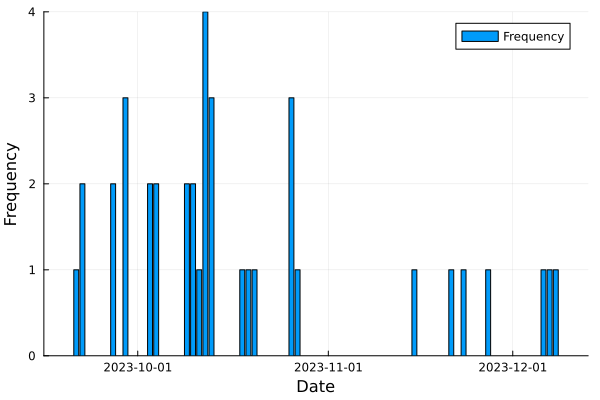

In [6]:
## Aggregate several lessons of the same day into one observation

# Create a new DataFrame with the required variables
result_df = combine(groupby(data, [:Full_name, :StartDate]), :MinutesMissed => sum)

# Rename columns for clarity
rename!(result_df, :MinutesMissed_sum => :TotalMinutesMissed)

# Display the result DataFrame
first(result_df)



# Scatter plot of the daily absences ("result_df")
scatter(result_df[!, "StartDate"], result_df[!, :Full_name], size=(800, 400), marker=:circle, color=:blue, label="Absences", xlabel="Start Time", ylabel="Full Name")



## Count the number of individuals with absences for a given date

# Group by start time and calculate the frequency for each time
time_summary = combine(groupby(result_df, :StartDate), nrow)

# Display the frequency table
first(time_summary)


## Scatter plot number of individuals absent on a given day
scatter(time_summary[!, :StartDate], time_summary[!, :nrow], xlabel="Start Time", ylabel="Frequency", label="Frequency")


## Bar chart of number of indivuals missing on a given day
bar(time_summary[!, :StartDate], time_summary[!, :nrow], xlabel="Date", ylabel="Frequency", label="Frequency")



In [7]:
## Create a new dataframe with observations for an entire period and with both states

# Feature engineering: Extract day of the week
result_df[!, :DayOfWeek] = Dates.dayname.(Dates.Date.(result_df[!, :StartDate]))

# Filter out weekends and holidays
weekdays_df = result_df[(result_df[!, :DayOfWeek] .!= "Saturday") .& (result_df[!, :DayOfWeek] .!= "Sunday"), :]


# Group by student and weekday and count absences
grouped_df = groupby(weekdays_df, [:Full_name, :DayOfWeek])
count_df = combine(grouped_df, :TotalMinutesMissed => sum => :AbsenceCount)


# Find the weekday with the maximum absences for each student
max_absence_day_df = combine(groupby(count_df, :Full_name), :AbsenceCount => argmax => :DayOfWeek, :AbsenceCount => maximum => :MaxAbsences)

# Add a column with the corresponding weekday
max_absence_day_df[!, :Weekday] = Dates.dayname.(Dates.Date.(max_absence_day_df[!, :DayOfWeek]))

# Display the result
first(max_absence_day_df)


# Create a DataFrame with all the dates you want to include
all_dates = DataFrame(StartDate = Date(2023, 9, 19):Date(2023, 12, 15))

# Filter weekdays
all_dates = filter(row -> Dates.dayofweek(row.StartDate) in 2:6, all_dates)


first(result_df)

Row,Full_name,StartDate,TotalMinutesMissed,DayOfWeek
,String15,Date,Int64,String
1,Connor,2023-09-27,330,Wednesday


In [8]:
## Create a database with all school days

# Rename the DataFrame
df = result_df

# Keep only the rows where DayOfWeek is "Friday"
df_filtered = filter(row -> row.:Full_name == "Connor", df)



## Create database of absences : binary variable (0=no absence; 1=absence)

# Define the input DataFrame
df_full = DataFrame(
    Full_name = String[],
    StartDate = Date[],
    TotalMinutesMissed = Int64[],
    DayOfWeek = String[]
)

# Define the date range
date_range = Date(2023, 9, 27):Day(1):Date(2023, 12, 8)

# Populate the DataFrame with the specified formats
for date in date_range
    push!(df_full, [
        "Last01",
        date,
        0,
        Dates.format(date, "EEEE")
    ])
end

df_full = filter(row -> row.DayOfWeek != "Saturday" && row.DayOfWeek != "Sunday", df_full)



## Merge the two dataframes into one
merged = outerjoin(df_full, df_filtered, on = :StartDate, makeunique=true)




## Create new binary variable : 0 = "no absence" , 1 = "absent"

# Create a new binary variable
 
function create_binary_variable(variableA)
  new_variable = fill(0, length(variableA))
  for i in 1:length(variableA)
    if ismissing(variableA[i])
      new_variable[i] = 0
    else
      new_variable[i] = 1
    end
  end
  return new_variable
end

merged[!,:absences] = create_binary_variable(merged.DayOfWeek_1)

merged_absences = merged

select!(merged_absences, Not(:TotalMinutesMissed, :Full_name_1	, :TotalMinutesMissed_1, :DayOfWeek_1  ))

first(merged_absences)

Row,Full_name,StartDate,DayOfWeek,absences
,String?,Date,String?,Int64
1,Last01,2023-09-27,Wednesday,1


In [11]:
## Compute transition matrix

sort!(merged_absences, (:StartDate))
first(merged_absences[merged_absences.Full_name .== "Last01", :])


Row,Full_name,StartDate,DayOfWeek,absences
,String?,Date,String?,Int64
1,Last01,2023-09-27,Wednesday,1
